# Facebook Prophet

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/BeerWineLiquor.csv')
df.columns = ['ds','y']
df["ds"] = pd.to_datetime(df["ds"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [3]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [4]:
df.shape

(324, 2)

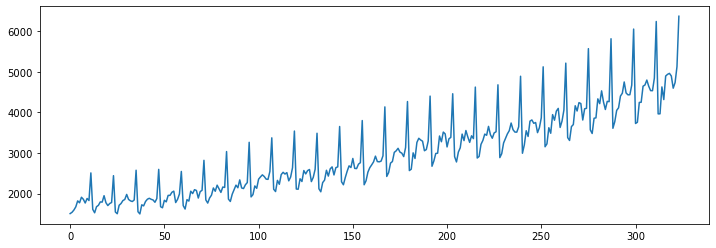

In [5]:
df["y"].plot(figsize = (12,4));

In [6]:
# Create model (use all the data rather than train/test)
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
# Create placeholder dataframe - note daily data is expected so set frequency if you are not
future = m.make_future_dataframe(periods = 24,freq = "MS" )
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [8]:
forecast = m.predict(future)

In [9]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1771.312291,1147.928507,1468.875438,1771.312291,1771.312291,-461.653037,-461.653037,-461.653037,-461.653037,-461.653037,-461.653037,0.0,0.0,0.0,1309.659254
1,1992-02-01,1774.175336,1185.935996,1520.072472,1774.175336,1774.175336,-427.115870,-427.115870,-427.115870,-427.115870,-427.115870,-427.115870,0.0,0.0,0.0,1347.059466
2,1992-03-01,1776.853668,1425.767958,1757.383108,1776.853668,1776.853668,-178.790756,-178.790756,-178.790756,-178.790756,-178.790756,-178.790756,0.0,0.0,0.0,1598.062912
3,1992-04-01,1779.716713,1425.220835,1750.888789,1779.716713,1779.716713,-196.311692,-196.311692,-196.311692,-196.311692,-196.311692,-196.311692,0.0,0.0,0.0,1583.405020
4,1992-05-01,1782.487401,1675.152988,1980.993343,1782.487401,1782.487401,44.675263,44.675263,44.675263,44.675263,44.675263,44.675263,0.0,0.0,0.0,1827.162664


In [10]:
forecast.shape

(348, 16)

In [11]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [12]:
f = forecast[['ds','yhat_lower', 'yhat_upper','yhat']]
f.head()

,ds,yhat_lower,yhat_upper,yhat
0,1992-01-01,1147.928507,1468.875438,1309.659254
1,1992-02-01,1185.935996,1520.072472,1347.059466
2,1992-03-01,1425.767958,1757.383108,1598.062912
3,1992-04-01,1425.220835,1750.888789,1583.405020
4,1992-05-01,1675.152988,1980.993343,1827.162664


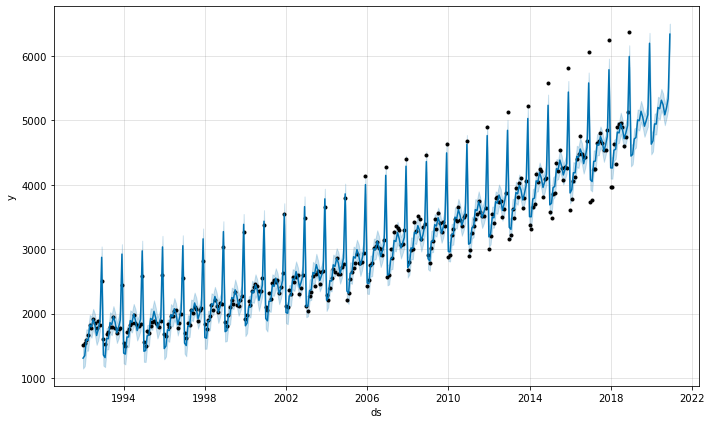

In [13]:
m.plot(forecast);

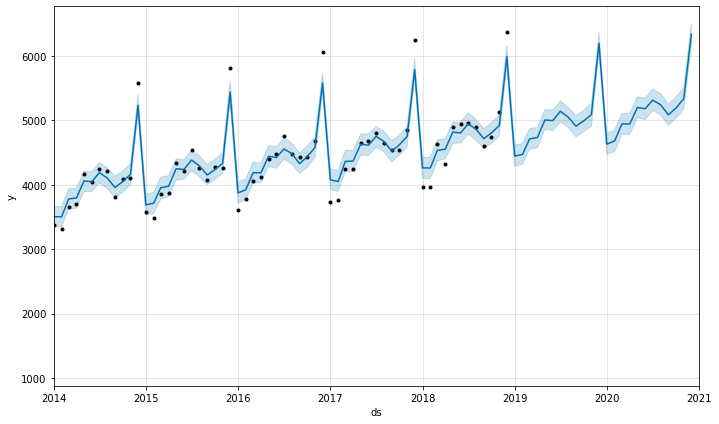

In [14]:
import datetime
m.plot(forecast)
plt.xlim([datetime.date(2014, 1, 1), datetime.date(2021, 1, 1)]);

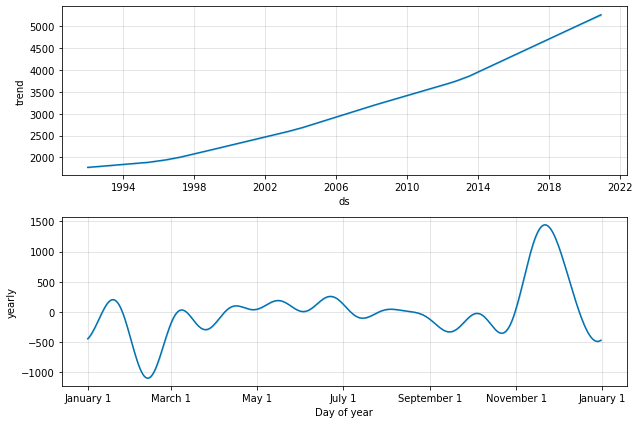

In [15]:
m.plot_components(forecast);

# Evaluation

In [16]:
df = pd.read_csv('./datasets/Miles_Traveled.csv')
df.columns = ['ds','y']
df["ds"] = pd.to_datetime(df["ds"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      588 non-null    datetime64[ns]
 1   y       588 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [17]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


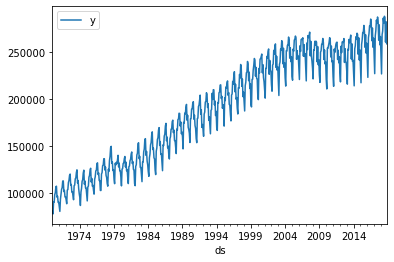

In [18]:
df.plot(x = "ds",y = "y");

In [19]:
df.shape

(588, 2)

In [20]:
# Run prophet on a training and test set this time
train = df.iloc[:576]
test = df.iloc[576:]

In [21]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods = 12, freq = "MS")
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,94181.559784,70020.178004,81446.538464,94181.559784,94181.559784,-18599.797646,-18599.797646,-18599.797646,-18599.797646,-18599.797646,-18599.797646,0.0,0.0,0.0,75581.762139
1,1970-02-01,94493.496722,61477.890761,72928.143239,94493.496722,94493.496722,-27108.834612,-27108.834612,-27108.834612,-27108.834612,-27108.834612,-27108.834612,0.0,0.0,0.0,67384.662111
2,1970-03-01,94775.246215,88706.017543,100389.537413,94775.246215,94775.246215,-36.299658,-36.299658,-36.299658,-36.299658,-36.299658,-36.299658,0.0,0.0,0.0,94738.946557
3,1970-04-01,95087.183153,89154.815694,100919.362975,95087.183153,95087.183153,27.606045,27.606045,27.606045,27.606045,27.606045,27.606045,0.0,0.0,0.0,95114.789197
4,1970-05-01,95389.057609,99412.237303,111037.050587,95389.057609,95389.057609,9610.744015,9610.744015,9610.744015,9610.744015,9610.744015,9610.744015,0.0,0.0,0.0,104999.801624


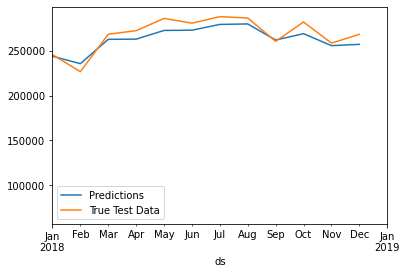

In [23]:
ax = forecast.plot(x = "ds", y = "yhat", legend = True, label = "Predictions")
test.plot(x = "ds", y = "y", label = "True Test Data", legend = True, 
          ax = ax,xlim=([datetime.date(2018, 1, 1), datetime.date(2019, 1, 1)]));

In [24]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-12:]['yhat']
error = rmse(test["y"], predictions)
error

8524.084735454997

In [25]:
test["y"].mean()

268739.6666666667

In [26]:
8524/268739*100

3.1718507548215924

# Using Prophet's Diagnostics

In [27]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [28]:
# Specify the initial time period for training
initial = 5*365
initial = str(initial) + " days"

# Specify the period to fold
period = 5*365
period = str(period) + " days"

# Specify forecast horizon for each period
horizon = 365
horizon = str(horizon) + " days"

In [29]:
df_cv = cross_validation(m, initial = initial, period = period, horizon = horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

In [31]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087397,107084.986201,109954.131283,102445.0,1976-12-11
1,1977-02-01,102996.111518,101508.126287,104420.033660,102416.0,1976-12-11
2,1977-03-01,118973.318133,117591.328734,120363.147076,119960.0,1976-12-11
3,1977-04-01,120612.923726,119167.363247,122000.049721,121513.0,1976-12-11
4,1977-05-01,127883.031847,126486.171115,129388.699949,128884.0,1976-12-11


In [34]:
performance_metrics(df_cv).head(10)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.440480e+07,4940.121674,4543.226142,0.027839,0.023430,0.4
1,53 days,2.189073e+07,4678.753115,4275.518107,0.025071,0.023430,0.4
2,54 days,1.845424e+07,4295.839617,3751.881988,0.020184,0.022341,0.5
3,55 days,2.353986e+07,4851.789757,4286.500962,0.023332,0.023430,0.4
4,57 days,2.121071e+07,4605.508636,4011.466093,0.021541,0.022341,0.5
5,58 days,2.348699e+07,4846.337936,4286.224015,0.022733,0.023430,0.4
6,59 days,3.812354e+07,6174.426002,5096.316189,0.026386,0.025097,0.4
7,60 days,3.904891e+07,6248.912464,5174.364762,0.026911,0.027632,0.4
8,62 days,3.741415e+07,6116.710612,4961.025360,0.025977,0.027632,0.4
9,80 days,3.255832e+07,5705.990041,4355.905193,0.023922,0.021016,0.5


Evaluation metrics for different prediction horizons. Plots better for daily data rather than the monthly data we have here

C:\Users\Imy Hull\anaconda3\envs\Prophet\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Imy Hull\anaconda3\envs\Prophet\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


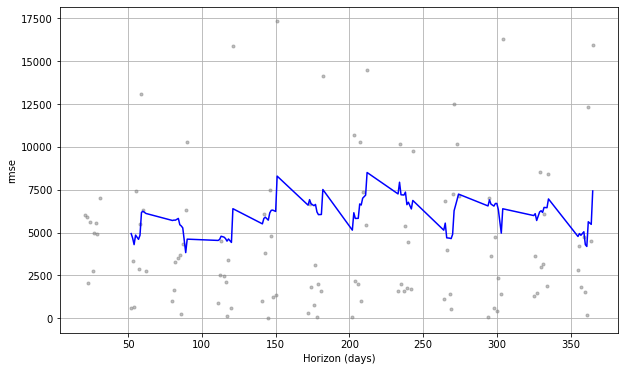

In [37]:
plot_cross_validation_metric(df_cv, metric = 'rmse');

# Prophet Trend

In [39]:
df = pd.read_csv('./datasets/HospitalityEmployees.csv')
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [41]:
df.columns = ['ds','y']
df["ds"] = pd.to_datetime(df["ds"])

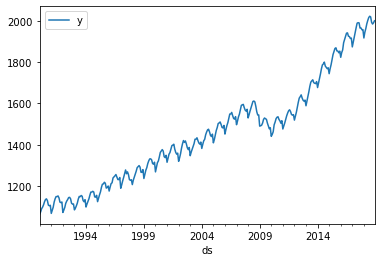

In [43]:
df.plot(x = "ds", y = "y");

Trend change in 2008. General trend upwards

In [44]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods = 12, freq = "MS")
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


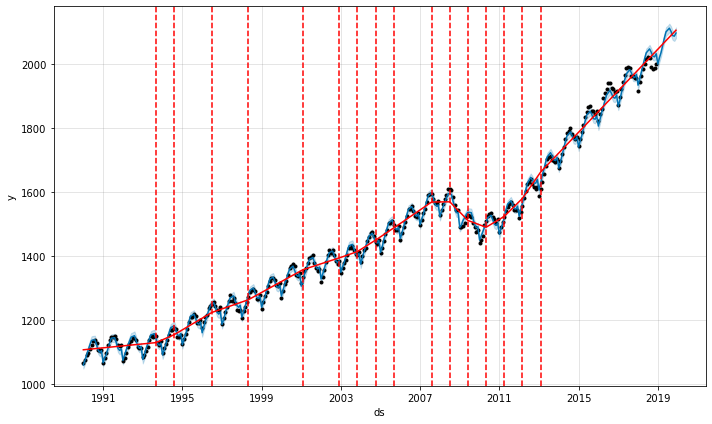

In [47]:
# To get the trend change points to show major points where the trend line changed
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Prophet Seasonality

Change seasonality from additive to multiplicative seasonality

In [54]:
df = pd.read_csv('./datasets/airline_passengers.csv')
df.columns = ["ds","y"]
df["ds"]= pd.to_datetime(df["ds"])
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


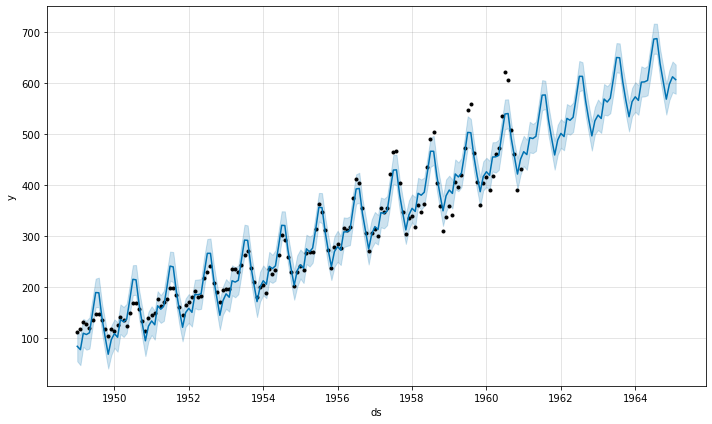

In [59]:
# Train on whole dataframe using changing seasonality
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods = 50, freq = "MS")
forecast = m.predict(future)
fig = m.plot(forecast)

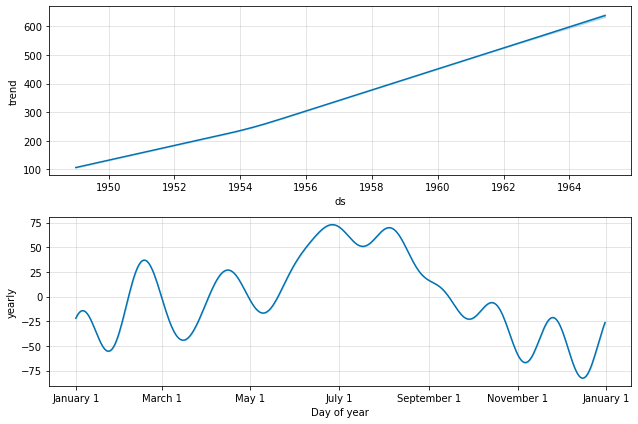

In [60]:
fig = m.plot_components(forecast)

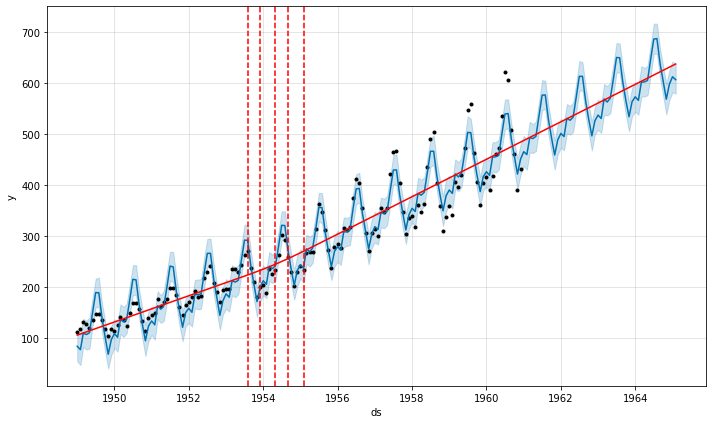

In [62]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


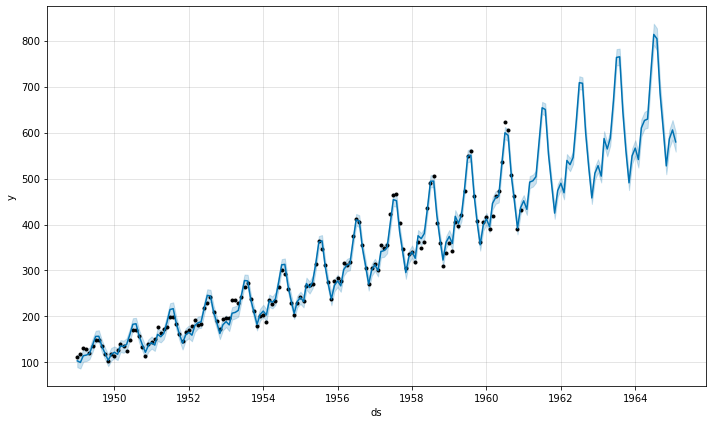

In [63]:
# Change seasonality to multiplicative
m = Prophet(seasonality_mode = "multiplicative")
m.fit(df)
future = m.make_future_dataframe(periods = 50, freq = "MS")
forecast = m.predict(future)
fig = m.plot(forecast)

This produces a better forecast